In [1]:
%matplotlib inline

import sys, io
import os
import numpy as np
from collections import defaultdict as ddict
from gensim.models import KeyedVectors
import pythainlp as pyt
import clean
# from attention import AttentionWithContext as att
# from keras.models import model_from_json
import matplotlib.pyplot as plt
import dill as pickle

# import tensorflow as tf
# from keras import backend as K

# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True
# K.tensorflow_backend.set_session(tf.Session(config=config))

In [2]:
# vector_model_dir = '../model/'
# vector_model_path_bin = f'{vector_model_dir}vec.bin'
# vector_model = KeyedVectors.load_word2vec_format(vector_model_path_bin, binary=True)

# itos = vector_model.index2word
# stoi = ddict(lambda: 0, {v:k for k,v in enumerate(itos)})

In [3]:
# input_len = 600
# pad_token = '_pad_'
# unk_token = '_unk_'

# def sub_space(tok_sentence):
# 	return list(map(lambda token: '_space_' if token == ' ' else token, tok_sentence))
# def sub_lol(tok_sentence):
# 	return list(map(lambda token: '_lol_' if token == 'lol' else token, tok_sentence))
# def pad_sentence(tok_sentence):
# 	if len(tok_sentence) > input_len:
# 		return tok_sentence[:input_len]
# 	else:
# 		return tok_sentence + [pad_token] * (input_len - len(tok_sentence))
# def sen2int(tok_list):
# 	tok_sentence = np.array(tok_list)
# 	new_int_sentence = []
# 	for list_tok in tok_sentence:
# 		tmp = []
# 		list_tok = sub_space(list_tok)
# 		list_tok = sub_lol(list_tok)
# 		list_tok = pad_sentence(list_tok)
# 		for tok in list_tok:
# 			if tok in itos:
# 				tmp.append(stoi[tok])
# 			else:
# 				tmp.append(stoi[unk_token])
# 		new_int_sentence.append(tmp)
# 	return new_int_sentence

In [4]:
[x_train, x_test, y_train, y_test] = np.load('../dataset/train_test_data.npy', allow_pickle=True)
x_train = x_train.astype('int32')
x_test = x_test.astype('int32')
print(x_train.shape, y_train.shape)
print(x_train.dtype, y_train.dtype)
print(x_test.shape, y_test.shape)
print(x_test.dtype, y_test.dtype)

print(f'pos size = { len(y_test[np.where( y_test[:,0] == 0 )]) }')
print(f'neg size = { len(y_test[np.where( y_test[:,0] == 1 )]) }')

# word_vec = np.load('../model/vec.npy')

# print(K.floatx()) # should equal float32

(34912, 600) (34912, 2)
int32 int32
(6161, 600) (6161, 2)
int32 int32
pos size = 3224
neg size = 2937


In [5]:
import statistics as stat

x_all = np.concatenate((x_train, x_test), axis=0)
y_all = np.concatenate((y_train, y_test), axis=0)

new_x_test = x_test
# new_y_test = y_test

# y_predict = model.predict_classes(x_all) 

# pad_i = stoi[pad_token]
pad_i = 4999
# print(x_all[0])
# print(np.where(x_all[0] == pad_i)[0])
get_first_pad_idx = lambda elem: np.where(elem == pad_i)[0]

x_all_nopad = list(map(lambda elem: np.delete(elem, get_first_pad_idx(elem)), x_all))
x_len = list(map(lambda x: len(x), x_all_nopad))
# print(x_len)

new_x_test_nopad = list(map(lambda elem: np.delete(elem, get_first_pad_idx(elem)), new_x_test))
new_x_test_len = list(map(lambda x: len(x), new_x_test_nopad))

mean = 30

# print(stat.mean(new_x_test_len), stat.stdev(new_x_test_len))
short_x_test, short_y_test = [], []
long_x_test, long_y_test = [], []


# for x,y in zip(x_test, y_test):
#     first_pad_idx = get_first_pad_idx(x)
#     try:
#         first_pad_idx = first_pad_idx[0]
#     except:
#         first_pad_idx = len(x_test[0])
    
#     if first_pad_idx < mean:
#         short_x_test.append(x)
#         short_y_test.append(y)
#     else:
#         long_x_test.append(x)
#         long_y_test.append(y)
        
# print(len(short_x_test), short_x_test[0], short_y_test)

# print(len(new_x_test_len), new_x_test_len)

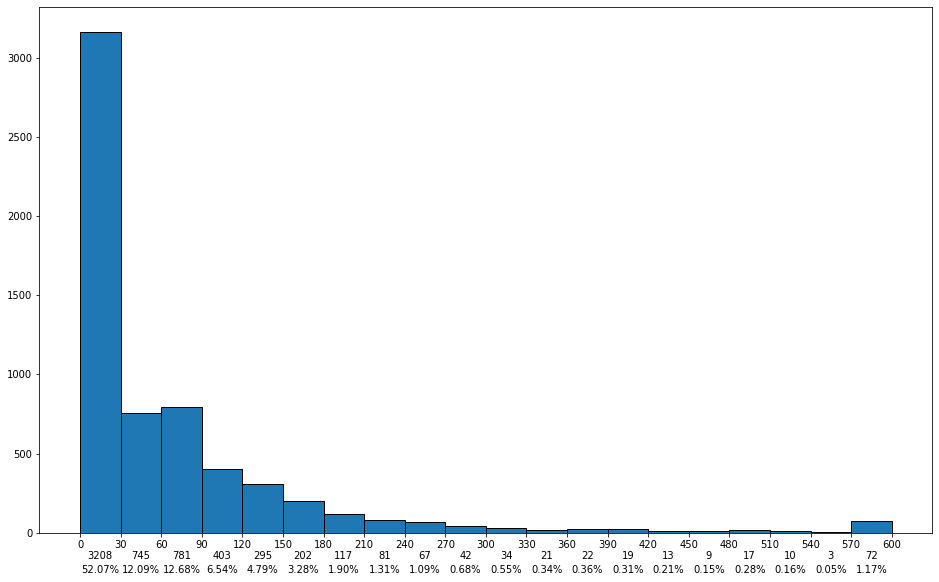

In [6]:
bins = [x for x in range(0, 600,30)]
# print(bins)

# plt.hist(x_len, bins=bins, range=(1,600))

fig, ax = plt.subplots(figsize=(16, 10))
counts, bins, patches = ax.hist(new_x_test_len, bins=range(0,601,30), range=(1,600), edgecolor='black')

x_len_mapped = list(map(lambda x: int((x-1)/30), new_x_test_len))
new_counts = [0]*(max(x_len_mapped)+1)     
for x in x_len_mapped:
    new_counts[x] += 1

ax.set_xticks(bins)

bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(new_counts, bin_centers):
    # Label the raw counts
    ax.annotate(str(int(count)), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.2f%%' % (100 * float(count) / sum(new_counts))
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')


# Give ourselves some more room at the bottom of the plot
plt.subplots_adjust(bottom=0.15)

In [7]:
# y_predict_all = model.predict_classes(x_all)

In [8]:
# print(y_predict_all)
# np.save('bgru_attn.npy', y_predict_all)

In [9]:
# print('Loading model from disk...')
# date = '20190305_090338'
# prefix_dir = 'result/gru_attn/'
# model_json = f'../model/{prefix_dir}model_{date}.json'
# model_weights = f'../model/{prefix_dir}model_{date}.h5'
# with open(model_json, 'r') as json_file:
#     model = model_from_json(json_file.read(), custom_objects={'AttentionWithContext': att})
# model.load_weights(model_weights)
# print('Loading model from disk sucessfully')

In [10]:
# y_predict_all_cnn = model.predict_classes(x_all)
# np.save('predicted/gru_attn.npy', y_predict_all_cnn)

In [11]:
from glob import glob

fileList = glob('predicted/*.npy')
dp = {}
for file in fileList:

    if os.name == 'nt':
        name = (file.split('\\')[-1]).split('.')[0]
    else:
        name = (file.split('/')[-1]).split('.')[0]
    dp[name] = np.load(file)
print(dp)
# print(x_len)

get_val = lambda arr: list(map(lambda x: x[1], arr))
y_true = get_val(y_test)

# res = list(map(lambda x: x[0]==x[1], zip(y_true, list(dp['bgru_attn']))))
# print(res.count(True)/len(res))

{'cnn': array([0, 1, 0, ..., 0, 1, 1]), 'lstm': array([0, 1, 0, ..., 0, 1, 1]), 'cnn_lstm': array([0, 1, 0, ..., 0, 1, 1]), 'gru': array([0, 1, 0, ..., 0, 1, 1]), 'gru_attn': array([0, 1, 0, ..., 0, 1, 1]), 'cnn_lstm_attn': array([0, 1, 0, ..., 1, 1, 1]), 'cnn_gru_attn': array([0, 1, 1, ..., 0, 1, 1]), 'lstm_attn': array([0, 1, 0, ..., 0, 1, 1]), 'cnn_attn': array([0, 1, 0, ..., 0, 1, 1]), 'cnn_gru': array([0, 1, 0, ..., 1, 1, 1])}


In [12]:
def create_bins():
    bins_template = {}
    for i in range(1,600,30):
        bins_template[f'{i}~{i+29}'] = 0
    return bins_template

# x_t = [1,29,30,31,59,60,61,89,90,91,570,571,600]
x_len_mapped = list(map(lambda x: int((x-1)/30), new_x_test_len))
# print(x_len_mapped)

df = {}
for (k,v) in dp.items():
    df[k] = [0]*(max(x_len_mapped)+1)
    
# map result to boolean
dp_boolean = {}
for key in dp.keys():
    dp_boolean[key] = list(map(lambda x: x[0]==x[1], zip(y_true, list(dp[key]))))

# put true into right bins
for k, v_list in dp_boolean.items():
    for idx, v in enumerate(v_list):
        if v:
            df[k][x_len_mapped[idx]] += 1
            
            
print(df)

new_counts = [0]*(max(x_len_mapped)+1)     
for x in x_len_mapped:
    new_counts[x] += 1
print(new_counts, sum(new_counts))

{'cnn': [2870, 687, 735, 385, 272, 194, 112, 76, 67, 41, 34, 21, 20, 18, 13, 9, 17, 10, 3, 68], 'lstm': [2861, 675, 736, 377, 275, 193, 114, 81, 66, 41, 34, 21, 20, 18, 13, 8, 17, 10, 3, 67], 'cnn_lstm': [2891, 679, 725, 369, 268, 194, 110, 77, 64, 41, 33, 21, 19, 17, 13, 8, 17, 10, 3, 65], 'gru': [2875, 681, 739, 378, 274, 193, 113, 79, 66, 42, 33, 21, 22, 17, 13, 9, 16, 10, 3, 67], 'gru_attn': [2865, 684, 742, 387, 273, 195, 115, 77, 67, 42, 34, 21, 19, 19, 13, 9, 17, 10, 3, 69], 'cnn_lstm_attn': [2849, 686, 730, 375, 267, 191, 109, 78, 67, 42, 33, 21, 20, 18, 13, 8, 17, 10, 3, 67], 'cnn_gru_attn': [2864, 680, 731, 377, 275, 194, 111, 78, 66, 42, 34, 20, 20, 18, 13, 8, 17, 10, 3, 69], 'lstm_attn': [2883, 675, 729, 378, 276, 194, 112, 77, 66, 42, 34, 21, 19, 18, 13, 9, 17, 10, 3, 66], 'cnn_attn': [2848, 675, 744, 384, 273, 197, 112, 77, 64, 42, 34, 20, 20, 18, 13, 9, 17, 10, 3, 67], 'cnn_gru': [2867, 687, 748, 380, 274, 196, 110, 76, 63, 38, 34, 21, 19, 17, 13, 9, 17, 10, 3, 67]}
[320

In [13]:
print(df['gru'])
print(list(map(int, new_counts)))

print(len(df['gru']))

res = {}
for k,v in df.items():
    res[k] = list(map(lambda x, y: x/y, v, new_counts))
print(res)

[2875, 681, 739, 378, 274, 193, 113, 79, 66, 42, 33, 21, 22, 17, 13, 9, 16, 10, 3, 67]
[3208, 745, 781, 403, 295, 202, 117, 81, 67, 42, 34, 21, 22, 19, 13, 9, 17, 10, 3, 72]
20
{'cnn': [0.8946384039900249, 0.9221476510067114, 0.941101152368758, 0.9553349875930521, 0.9220338983050848, 0.9603960396039604, 0.9572649572649573, 0.9382716049382716, 1.0, 0.9761904761904762, 1.0, 1.0, 0.9090909090909091, 0.9473684210526315, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9444444444444444], 'lstm': [0.8918329177057357, 0.9060402684563759, 0.942381562099872, 0.9354838709677419, 0.9322033898305084, 0.9554455445544554, 0.9743589743589743, 1.0, 0.9850746268656716, 0.9761904761904762, 1.0, 1.0, 0.9090909090909091, 0.9473684210526315, 1.0, 0.8888888888888888, 1.0, 1.0, 1.0, 0.9305555555555556], 'cnn_lstm': [0.9011845386533666, 0.9114093959731544, 0.9282970550576184, 0.9156327543424317, 0.9084745762711864, 0.9603960396039604, 0.9401709401709402, 0.9506172839506173, 0.9552238805970149, 0.9761904761904762, 0.970588235294117

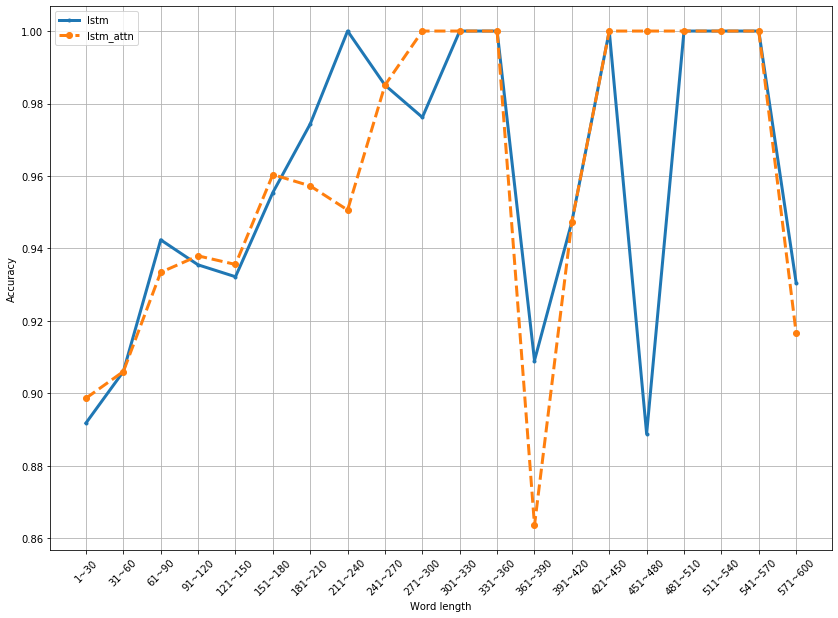

In [21]:
allow = ['lstm', 'lstm_attn']
new_res = dict(filter(lambda e: e[0] in allow, res.items()))
# new_res = res # no filter

xticks = [f'{i}~{i+29}' for i in range(1,601,30)]

mk = ['.-', 'o--', '^-.', 'v:', '_-',',--','d-.','<:','>-','p--']
fmt = {}
for idx, k in enumerate(new_res.keys()):
    fmt[k] = mk[idx]

x_axis = list(range(0,20))
fig1, ax1 = plt.subplots(figsize=(14, 10))
for k,v in new_res.items():
    ax1.plot(x_axis, v, fmt[k], label=f'{k}', linewidth=3)
leg = ax1.legend(loc='upper left')
plt.xticks([i for i in range(20)], xticks, rotation=45)
ax1.set_xlabel("Word length")
ax1.set_ylabel("Accuracy")

ax1.xaxis.grid()
ax1.yaxis.grid()

plt.show()

In [15]:
# import os
# from dotenv import load_dotenv
# load_dotenv()
# pos_name = os.getenv('pos_file_name')
# neg_name = os.getenv('neg_file_name')

# pos_tok = pickle.load(open(f'../dataset/{pos_name}_tok.pkl', 'rb'))
# neg_tok = pickle.load(open(f'../dataset/{neg_name}_tok.pkl', 'rb'))

In [16]:
# print(len(pos_tok) + len(neg_tok))